In [ ]:
!pip install networkx
!pip install matplotlib

In [1]:
import networkx as nx
import pandas as pd 
import numpy as np

G = nx.Graph()


In [2]:
import json

nameToCCA3 = {}
CCA3toName = {}

#Build CCA3 maps & add nodes
with open('countries.json') as json_file:  
    data = json.load(json_file)
    for p in data:
        nameToCCA3[p['name']['common']] = p['cca3']
        CCA3toName[p['cca3']] = p['name']['common']
        #print(p['name']['common'])
        G.add_node(p['name']['common'])


In [ ]:
CCA3toName

In [3]:
with open('countries.json') as json_file:  
    data = json.load(json_file)
    for p in data:
        #print('Borders: ')
        #print(p['borders'])
        source = p['cca3']
        for dest in p['borders']:
            #print("FROM: " + CCA3toName[p['cca3']] + " TO: " + CCA3toName[dest])
            #print (dest)
            #print("FROM: " + CCA3toName[p['cca3']] + " TO: " + CCA3toName[dest])
            G.add_edge(CCA3toName[p['cca3']], CCA3toName[dest])
        #G.add_node(p['cca3'])

In [ ]:
print(G.number_of_nodes())
print(G.number_of_edges())

In [ ]:
list(G.nodes)

In [ ]:
list(G.edges) #these are undirected edges

In [4]:
#want to find shortest paths between our 20 countries
countries = ["Australia", "Brazil", "Canada", "Colombia", "Costa Rica", "France", "Germany", "Guatemala", "Hong Kong",
            "India", "Japan", "Mexico", "Netherlands", "New Zealand", "Philippines", "Singapore", "Sweden", "Turkey", "United Kingdom", "United States"];

allshortestpaths = nx.shortest_path(G)

In [5]:
allshortestpathsdict = {}

for x in countries:
    countryshortestpathsdict = {}
    for y in countries:
        if x != y and y in allshortestpaths[x].keys():
            #print(x)
            #print(y)
            #print(allshortestpaths[x][y])
            countryshortestpathsdict[y] = allshortestpaths[x][y]
    allshortestpathsdict[x] = countryshortestpathsdict

allshortestpathsdict

{'Australia': {},
 'Brazil': {'Canada': ['Brazil',
   'Colombia',
   'Panama',
   'Costa Rica',
   'Nicaragua',
   'Honduras',
   'Guatemala',
   'Mexico',
   'United States',
   'Canada'],
  'Colombia': ['Brazil', 'Colombia'],
  'Costa Rica': ['Brazil', 'Colombia', 'Panama', 'Costa Rica'],
  'Guatemala': ['Brazil',
   'Colombia',
   'Panama',
   'Costa Rica',
   'Nicaragua',
   'Honduras',
   'Guatemala'],
  'Mexico': ['Brazil',
   'Colombia',
   'Panama',
   'Costa Rica',
   'Nicaragua',
   'Honduras',
   'Guatemala',
   'Mexico'],
  'United States': ['Brazil',
   'Colombia',
   'Panama',
   'Costa Rica',
   'Nicaragua',
   'Honduras',
   'Guatemala',
   'Mexico',
   'United States']},
 'Canada': {'Brazil': ['Canada',
   'United States',
   'Mexico',
   'Guatemala',
   'Honduras',
   'Nicaragua',
   'Costa Rica',
   'Panama',
   'Colombia',
   'Brazil'],
  'Colombia': ['Canada',
   'United States',
   'Mexico',
   'Guatemala',
   'Honduras',
   'Nicaragua',
   'Costa Rica',
   'Panam

In [6]:
cosSim = pd.read_csv("normalizedCosSimilarity.csv") 
cosSim.head()

topquarter = []
secondquarter = []
bottomhalf = []
counter = 0
for idx, row in cosSim.iterrows():
    if counter < 47 and row[0] != row[1] and row[1] in allshortestpathsdict[row[0]].keys():
        print (row[0] + ", " + row[1])
        print(allshortestpathsdict[row[0]][row[1]])
        topquarter.append(len(allshortestpathsdict[row[0]][row[1]]))
    elif counter < 94 and row[0] != row[1] and row[1] in allshortestpathsdict[row[0]].keys():
        print (row[0] + ", " + row[1])
        print(allshortestpathsdict[row[0]][row[1]])
        secondquarter.append(len(allshortestpathsdict[row[0]][row[1]]))
    elif row[0] != row[1] and row[1] in allshortestpathsdict[row[0]].keys():
        print (row[0] + ", " + row[1])
        print(allshortestpathsdict[row[0]][row[1]])
        bottomhalf.append(len(allshortestpathsdict[row[0]][row[1]]))
    counter+=1

#nodearr = pd.unique(trade[['Country 1', 'Country 2']].values.ravel('K'))
#for n in nodearr:
#    G.add_node(n)

#for idx, row in trade.iterrows():
#    G.add_edge(row[0], row[1])

Guatemala, Mexico
['Guatemala', 'Mexico']
Sweden, Hong Kong
['Sweden', 'Finland', 'Russia', 'China', 'Hong Kong']
Hong Kong, India
['Hong Kong', 'China', 'India']
Turkey, Netherlands
['Turkey', 'Azerbaijan', 'Russia', 'Poland', 'Germany', 'Netherlands']
France, Germany
['France', 'Germany']
Turkey, Hong Kong
['Turkey', 'Azerbaijan', 'Russia', 'China', 'Hong Kong']
United States, Canada
['United States', 'Canada']
Sweden, India
['Sweden', 'Finland', 'Russia', 'China', 'India']
Sweden, Netherlands
['Sweden', 'Finland', 'Russia', 'Poland', 'Germany', 'Netherlands']
Hong Kong, Netherlands
['Hong Kong', 'China', 'Russia', 'Poland', 'Germany', 'Netherlands']
Colombia, Mexico
['Colombia', 'Panama', 'Costa Rica', 'Nicaragua', 'Honduras', 'Guatemala', 'Mexico']
Turkey, India
['Turkey', 'Iran', 'Pakistan', 'India']
Turkey, Sweden
['Turkey', 'Azerbaijan', 'Russia', 'Finland', 'Sweden']
France, Netherlands
['France', 'Belgium', 'Netherlands']
India, Netherlands
['India', 'China', 'Russia', 'Poland

In [ ]:
print(np.mean(topquarter))
print(np.mean(secondquarter))

print(np.mean(bottomhalf))

In [35]:
Gsmall = nx.Graph()
for n in countries:
    Gsmall.add_node(n)
for orig_country, country_info in allshortestpathsdict.items():
    for dest_country, path in country_info.items():
        print("ADDING EDGE FROM " + orig_country + " TO " + dest_country)
        Gsmall.add_edge(orig_country, dest_country, weight=len(path)-1)



ADDING EDGE FROM Brazil TO Canada
ADDING EDGE FROM Brazil TO Colombia
ADDING EDGE FROM Brazil TO Costa Rica
ADDING EDGE FROM Brazil TO Guatemala
ADDING EDGE FROM Brazil TO Mexico
ADDING EDGE FROM Brazil TO United States
ADDING EDGE FROM Canada TO Brazil
ADDING EDGE FROM Canada TO Colombia
ADDING EDGE FROM Canada TO Costa Rica
ADDING EDGE FROM Canada TO Guatemala
ADDING EDGE FROM Canada TO Mexico
ADDING EDGE FROM Canada TO United States
ADDING EDGE FROM Colombia TO Brazil
ADDING EDGE FROM Colombia TO Canada
ADDING EDGE FROM Colombia TO Costa Rica
ADDING EDGE FROM Colombia TO Guatemala
ADDING EDGE FROM Colombia TO Mexico
ADDING EDGE FROM Colombia TO United States
ADDING EDGE FROM Costa Rica TO Brazil
ADDING EDGE FROM Costa Rica TO Canada
ADDING EDGE FROM Costa Rica TO Colombia
ADDING EDGE FROM Costa Rica TO Guatemala
ADDING EDGE FROM Costa Rica TO Mexico
ADDING EDGE FROM Costa Rica TO United States
ADDING EDGE FROM France TO Germany
ADDING EDGE FROM France TO Hong Kong
ADDING EDGE FROM F

In [ ]:
list(Gsmall.nodes)
list(Gsmall.edges)

KeyError: 'Brazil'

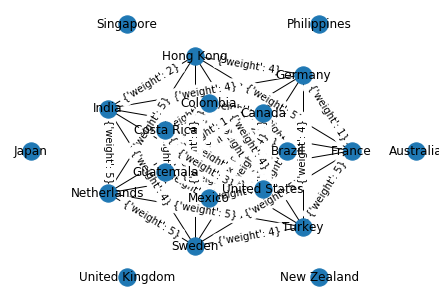

In [44]:
import matplotlib.pyplot as plt
#!pip install scipy
from scipy.optimize import minimize

options = {
    'node_color': 'green',
    'node_size': 50,
    'width': 1,
}
#nx.draw(Gsmall, **options)

#pos = nx.spring_layout(Gsmall,k=0.15,iterations=20)

#fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
#plt.figure(figsize=(1000,1000))

#nx.draw_networkx(Gsmall, with_labels=True, pos=nx.circular_layout(Gsmall))
#pos = nx.get_node_attributes(Gsmall, 'pos')
nx.draw_shell(Gsmall, nlist=[['Brazil', 'Canada', 'Colombia', 'Costa Rica', 'Guatemala', 'Mexico', 'United States'], ['France', 'Germany', 'Hong Kong', 'India', 'Netherlands', 'Sweden', 'Turkey'], ["Australia", "Philippines", "Singapore", "Japan", "United Kingdom", "New Zealand"]], with_labels=True)
edge_labels = nx.draw_networkx_edge_labels(Gsmall, pos=nx.shell_layout(Gsmall, nlist=[['Brazil', 'Canada', 'Colombia', 'Costa Rica', 'Guatemala', 'Mexico', 'United States'], ['France', 'Germany', 'Hong Kong', 'India', 'Netherlands', 'Sweden', 'Turkey'], ["Australia", "Philippines", "Singapore", "Japan", "United Kingdom", "New Zealand"]]))

nx.draw_networkx_edge_labels(Gsmall, edge_labels)
#plt.savefig("test.png") # save as png
plt.show()

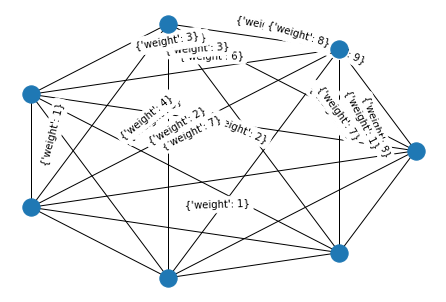

In [55]:
import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline


NAM = Gsmall.subgraph(['Brazil', 'Canada', 'Colombia', 'Costa Rica', 'Guatemala', 'Mexico', 'United States'])
EurA = Gsmall.subgraph(['France', 'Germany', 'Hong Kong', 'India', 'Netherlands', 'Sweden', 'Turkey'])
Iso = Gsmall.subgraph(["Australia", "Philippines", "Singapore", "Japan", "United Kingdom", "New Zealand"])

#nx.draw(NAM)
nx.draw_shell(NAM)
edge_labels=nx.draw_networkx_edge_labels(NAM,pos=nx.shell_layout(G))
#labels = nx.get_edge_attributes(NAM,'weight')
#nx.draw_networkx_edge_labels(NAM,edge_labels=labels)
plt.show()



In [ ]:
pos = nx.spring_layout(Gsmall)  # positions for all nodes
elarge = [(u, v) for (u, v, d) in Gsmall.edges(data=True) if d['weight'] > 3]
esmall = [(u, v) for (u, v, d) in Gsmall.edges(data=True) if d['weight'] <= 2]
# nodes
nx.draw_networkx_nodes(Gsmall, pos, node_size=100)

# edges
nx.draw_networkx_edges(Gsmall, pos, edgelist=elarge,
                       width=6)
nx.draw_networkx_edges(Gsmall, pos, edgelist=esmall,
                       width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(Gsmall, pos, font_size=20, font_family='sans-serif')

plt.axis('off')

plt.show()